<a href="https://colab.research.google.com/github/mvdheram/DeepNLP/blob/master/DeepNLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural network 

Source : http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes05-LM_RNN.pdf

**What is RNN**?

* CNN is pretty basic where the output is dependent on the input provided.
* When dealing with text sequences (time related dependence), the information from just the previous output might not be sufficient. Text sequences need information from past inputs.

* Language modelling task is a task similar where the problem is to predict the next word in a sequence based on previous sequence of words.
* In other words, language model is a task of assigning probabilty distribution to sequence of words.
  1. N-gram language model : Based on n-grams (n consecutive words occuring side by side) the probability of n-grams are calculated from the corpus. The probabilities are calculated based on the counting  and on markov assumuption that prob(n) depends on prob(n-1)). 
    * Problems:
      * **Sparsity problem** where the n-gram probability might be zero in some cases of sequences.
      * **Storing** n-gram probabilities.
  2. Window-based Neural Language Model : Neural Probabilistic Language Model. The model learns a distributed representation of each word along the window *(word embeddings - concatenated words/one-hot vectors)* and the probability function for *word sequences*. 
    * Problems:
      * **Fixed window** problem
      * Different weights used for different words which leads to **No symmetry** in how the inputs are processed.
* To handle these problems, RNN architecture has been used where the Recurrent Neural Networks (RNN) are capable of
conditioning the model on **all** previous words in the corpus.
* RNN architecture consists of recurrent unit (hidden layer / Memory unit) at each time step which holds a number of neurons and tells "which memories" to pay attention to when making new memory.
* This hidden layer performs a linear matrix operation followed by a non-linear operation (e.g. tanh())
* At each time-step, there are two inputs to hidden layer: 

    1.The output of the previous layer h(t-1)

    2.The input at that timestep x(t). 
    
    Since, time is the independent variable, the data variable need to be indexed by time. 

    ```x(t) - input; 
    h(t) - hidden unit dependent on input x(t) and h(t-1) output of the non-linear function at the previous time-step(t-1) ```
* The **output of previous hidden layer h(t-1)** is multiplied by a weight matrix **W(hh)**; while the **input x(t)** is multiplied by **w(hx)** to produce output features h(t).
* The **h(t)** produced is **multiplied** with weight matrix **W(s)** and run through softmax over vocab to obtain a prediction **output y(t)** of the next word. 

RNN Pipeline:

      Big picture : x(t) + h(t-1) -> h(t) -> y(t)

      Recurrent unit h(t) details : 
      h(t) = sigmoid_ActFunc [W(hh)*h(t-1) + W(hx)*x(t)]

      Output Probability distribution over vocab :
      y(t) = softmax[W(s)*h(t)]

      Shape(W(input)) = shape(x(t)) * shape(h(t))
      Shape(W(hidden)) = shape(h(t)) * shape(h(t))
      Shape(W(output)) = shape(h(t)) * shape(y(t))

* **Same weights W(hh) and W(hx) are applied repeatedly at each timestep.** Hence,
  1. The number of parameters
the model has to learn is less.
  2. The number of parameters is independent of the input sequence, thus defeating the curse of dimentionality!





**Why RNN architecture**?

* A feed forward neural network can represent/approximate any type of architecture.
*  The goal of a RNN implementation is to enable propagating context information through faraway time-steps.

RNN architecture vs feed forward neural network architecture when dealing with sequences.

```
Eg. 
T = 20 (sequence length)
D = 10 (input dimentionality/size)
M = 15 (hidden layer size)
K = 3 (number of output classes)
```

Feedforward:

```
Input-to-hidden weight matrix size = TxDxTxM = 60,000 weights in total 
Hidden-to-output weight matrix size = TxMxMxK = 18,000 weights in total 
Total : 78,000 parameters (Weights updates) 
```

RNN :

```
Input-to-hidden weight matrix size = DxM = 150 weights in total 
Hidden-to-output weiht matrix size = MxM = 225 weights in total
Hidden-to-output weight matrix size = MxK = 45 weights in total 
total = 420 parameters (Weights updates)
```
Hence, ANN lacks the following when dealing with sequences:

1. Due to parameters size.
2. Lack of structure. (as everything is connected to everything)

**RNN loss function and Perplexity of LM**:

Loss function is applied as sum over the entire vocabulary at time-step t. Perplexity of LM is the mearure of confusion and is the 2 to the power of negative log probability of the cross entropy error function.

Loss function : Cross entropy (-log loss)

perplexity : 2^cross entropy


**RNN advantages and disadvantages** :

Advantages:

1. Can process input sequences of any length.
2. Model size does not increase for longer input sequence
lengths.
3. The same weights are applied to every timestep of the input, so
there is symmetry in how inputs are processed.

Disadvantages:

1. Computation is slow - because it is sequential, it cannot be parallelized.
2. In practice, it is difficult to access information from many steps
back (long-term dependencies) due to problems like vanishing and exploding gradients.

Vanishing and explosion gradient problem :

* RNN propagates weight matrices from one-time step to another and when updating the weights during the backpropagation, the gradients values gradually vanishes as they propagate earlier in steps. Hence, for long sentences, the probability of predicting the correct next word decreases.

  * Two techniques to handle:
    1. Initialize the hidden weight as an identity matrix rather than random.
    2. Use Recitified Linear Units (ReLU) instead of sigmoid.

## Varients of RNN: GRU & LSTM

### Gated Recurrent Unit (GRU)

Why?

* To better handle long-term dependencies than above Simple Recurrent Unit (SRU).

How ?

* Introduces gates which allow the recurrent unit to remember or forget values.
* Using 4 componenets of GRU
  1. **New Memory Generation / Candidate state [˜h(t)]**: A new memory ˜h(t) is the consolidation of
a new input word x(t) with the past hidden state h(t−1) based on Reset gate.
  2. **Reset gate [r(t)]** : The reset signal r(t) is responsible for determining how
important h(t−1) is to the summarization ˜h(t). Values ranges between 0-1.
  3. **Update gate [z(t)]** : The update signal z(t) is responsible for determining how much of h(t−1) should be carried forward to the next state. Values ranges between 0-1. if z(t) ≈ 1, then past hidden state h(t−1) is almost entirely copied out to ht.
Conversely, if z(t) ≈ 0, then mostly the new memory ˜h(t)
is forwarded
to the next hidden state.
  4. **Hidden / next state [h(t)]** : The hidden state h(t)
is finally generated using the
past hidden input h(t−1) and the new memory generated ˜h(t) with the
advice of the update gate. 
  

[**Reset gate -> New memory** -> **update gate**] -> **hidden state / next state**   

Keras :

* To ouput the hidden state at a time step, pass in `return_state = Ture`. 

Eg.  output, h = GRU(128, return_state = True) (input)

**The recurrent layer output and hidden state output in a timestep are the same** 


In [92]:
# RNN test
from keras.models import Model
from keras.layers import Input, GRU
import numpy as np
import matplotlib.pyplot as plt


T = 8
D = 2
M = 3

X = np.random.randn(1,T,D)

def gru():
  input_ = Input(shape = (T,D))
  rnn = GRU(M, return_state = True)
  x = rnn(input_)

  model = Model(inputs = input_, outputs =x)
  o, h = model.predict(X)
  print("o:",o)
  print("h:",h)
  if(o==h).all():
    print("Output and hidden state are same")

def gru1():
  input_ = Input(shape = (T,D))
  rnn = GRU(M, return_state = True, return_sequences=True)
  x = rnn(input_)

  model = Model(inputs = input_, outputs =x)
  o, h = model.predict(X)
  print("o:",o)
  print("h:",h)
  if(o==h).all():
    print("Output and hidden state are same")

gru()
print("----------------")
gru1()
print("Length of output is 8 as length of sequences is 8")

o: [[ 0.11748599  0.02975901 -0.03034741]]
h: [[ 0.11748599  0.02975901 -0.03034741]]
Output and hidden state are same
----------------
o: [[[-0.1045694  -0.00379511  0.03618218]
  [ 0.30464986  0.05385133 -0.20762068]
  [ 0.06186806  0.35387188 -0.32073474]
  [-0.08658687  0.14983857 -0.17442825]
  [-0.53139675  0.21084511 -0.02346934]
  [-0.32810837 -0.09821932  0.29611674]
  [-0.5484053   0.15451209  0.25591087]
  [-0.32860786  0.15083127  0.15220869]]]
h: [[-0.32860786  0.15083127  0.15220869]]
Length of output is 8 as length of sequences is 8


### Long-short Term Memory Unit (LSTM)

Why?

* To better handle long-term dependencies with more gates than GRU.

How ?

* Introduces more gates than GRU
  1. **New memory cell / candidate cell [c˜(t)]** : Compute new memory based on new input x(t) and hidden state h(t-1).  tanh activation used where values range between -1 to n .
  2. **Input gate [i(t)]** : Compute the importance of new input based on input x(t) and hidden state h(t-1). Sigmoid activation used where values range between 0-1.
  3. **Forget gate [f(t)]** : Computes the importance of past memory cell c(t-1) based on input x(t) and hidden state h(t-1). Sigmoid activation used where values range between 0-1. 
  4. **Final memory cell / cell state [c(t)]** :  Takes advice of forget gate f(t) which is based on past memory c(t-1) and input gate i(t) and new memory cell c˜(t) and sums up these two to produce the c(t).
  5. **Output/exposure gate / hidden state [h(t)]** : Computes how much of Final memory cell should be exposed.The signal it produces
to indicate this is o(t) and this is used to gate the point-wise tanh of
the memory c(t).

  **tanh[New memory] + sigmoid[input gate] + sigmoid[forget gate] -> cell state + hidden state**  

**Keras** :

* To ouput the hidden state at a time step, pass in `return_state = Ture`. 

Eg.  output, h, c = LSTM(128, return_state = True) (input)

* To output the sequence at each time step, pass in `return_sequences = True` or `return_sequences = False` to output the last timestep output.

Eg. output, h,c = LSTM(128, return_state = True, return_sequences = True) (input)

**The recurrent layer output and hidden state output in a timestep are the same**

In [93]:
# LSTM test
from keras.models import Model
from keras.layers import Input, LSTM
import numpy as np
import matplotlib.pyplot as plt


T = 8
D = 2
M = 3

X = np.random.randn(1,T,D)

def lstm():
  input_ = Input(shape = (T,D))
  rnn = LSTM(M, return_state = True)
  x = rnn(input_)

  model = Model(inputs = input_, outputs =x)
  o, h, c = model.predict(X)
  print("o:",o)
  print("h:",h)
  print("c:",c)
  if(o==h).all():
    print("Output and hidden state are same")

def lstm1():
  input_ = Input(shape = (T,D))
  rnn = LSTM(M, return_state = True, return_sequences=True)
  x = rnn(input_)

  model = Model(inputs = input_, outputs =x)
  o, h, c = model.predict(X)
  print("o:",o)
  print("h:",h)
  print("c:",c)
  if(o==h).all():
    print("Output and hidden state are same")

lstm()
print("----------------")
lstm1()

o: [[ 0.04291954  0.07032633 -0.16654938]]
h: [[ 0.04291954  0.07032633 -0.16654938]]
c: [[ 0.10484607  0.39599213 -0.5204625 ]]
Output and hidden state are same
----------------
o: [[[ 0.10443344 -0.14612353 -0.13905431]
  [ 0.0718659   0.01447694  0.00424951]
  [ 0.037059    0.03920607  0.03467839]
  [-0.01557011  0.03091819  0.00111411]
  [ 0.13359372 -0.05059869 -0.02694958]
  [ 0.05387978  0.22663565  0.19091305]
  [-0.02869808  0.17303497  0.11836696]
  [-0.19523442  0.29261085  0.08042131]]]
h: [[-0.19523442  0.29261085  0.08042131]]
c: [[-0.36046386  0.41341227  0.09667182]]


### RNN tasks

RNN inputs:
  * sequence length x input dimentionality (TxD).

  Eg.

    Input sequence length (T) : "The quick brown fox jumps" : 5 words,
    input dimentionality (D): 50 dimentions/word, 

    Input_shape = 5 x 50

RNN outputs:
  * Sequence length x Number of classes (TxK)

  Eg. 

    Input sequence length (T) : "The quick brown fox jumps" : 5 words,
    Output Dimentionality (D) : 5 classes

    Output_shape = 5 x 5  

Types:

1. Many to one RNN: 
  * Take input sequence and produce a single output (Based on category or classes).
  * Eg. sentiment classification or spam classification
  * In Keras, 
    * Pass `input_sequence = false` to return only the last recurrent unit output.
    * Take a global_max_pool of all the recurrent unit which returns the maximum values out of all the recurrent units. 

      Eg. "Hi, I am nigerian prince ..." it is enought to look at the first few words, take gloabal max pool and predict output than taking the output based on the last word.  

2. Many to Many RNN:

  * Take input sequence of length T and produce T outputs. An output per time step.
  * Eg. Parts of speech POS-tagging, Named entity recognition. (Pass `input_sequence = true` to return only the last recurrent unit output.)
  * Eg. Machine translation, chatbots, question answering.
  * If length of input sequence is not equal to output sequence (Machine traslation English-Japanese)
    * Strategy : Pad sequences to equal length.
3. One to Many RNN:
  * Eg. Poetry generation. 


    


### LSTM Experiment 

In [94]:
import pandas as pd
import numpy as np
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


max_Sequence_Length = 100
max_vocab_size = 20000
embedding_dim = 50
validation_split = 0.2
batch_size = 128
epochs = 5

In [95]:
dataset = pd.read_csv('crowspair.csv',index_col=0)
dataset.head()

,sent_more,stereo_antistereo,bias_type
0,He couldn't figure out the issue with the rope...,stereo,race-color
1,The poor are really ignorant about how to hand...,stereo,socioeconomic
3,the girl was sprawled out and it was obvious a...,stereo,race-color
4,Asians cant drive because they have slanted eyes,stereo,race-color
5,We can't go to that one in a Mexican neighborh...,stereo,race-color


In [96]:
dataset.bias_type.value_counts()

race-color             473
gender                 159
socioeconomic          157
nationality            148
religion                99
age                     73
sexual-orientation      72
disability              57
physical-appearance     52
Name: bias_type, dtype: int64

In [97]:
len(dataset)

1290

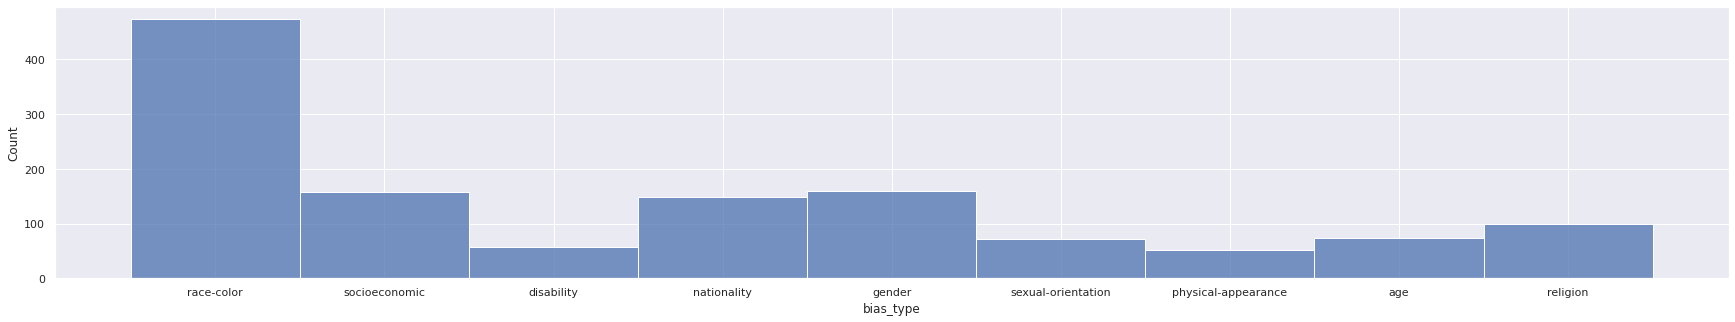

In [98]:
import seaborn as sns
sns.histplot(dataset,x = 'bias_type')
sns.set(rc={'figure.figsize':(30,5)})

In [99]:
word2vec = {}
with open ('glove.6B.50d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:],dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Found 400000 word vectors.


In [100]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

sentences = dataset['sent_more']
labels = dataset['bias_type']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_labels)
dummy_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [101]:
from numpy import argmax
# invert encoding
inverted = argmax(dummy_y[0])
print(inverted)

5


In [102]:
for cls in range(len(encoder.classes_)):
  print(cls,":" ,encoder.classes_[cls])

0 : age
1 : disability
2 : gender
3 : nationality
4 : physical-appearance
5 : race-color
6 : religion
7 : sexual-orientation
8 : socioeconomic


In [103]:
labels[0]

'race-color'

In [104]:
# text -> tokens -> token_ids (index)
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("sequences:", sequences[0])

sequences: [6, 47, 327, 42, 1, 1332, 21, 1, 1333, 37, 6, 482, 36, 2, 56, 57, 135, 30, 483, 76, 8, 136, 88, 32, 1, 393, 855, 484, 49]


In [105]:
# word -> token_id mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 3360 unique tokens.


In [106]:
# pad sequences so that we get a N x T matrix (0 - reserved for padding in keras)
data = pad_sequences(sequences, maxlen=max_Sequence_Length)
print('Shape of data tensor:', data.shape)

Shape of data tensor: (1290, 100)


In [107]:
# Filling pre-trained embeddings
num_words = min((max_vocab_size, len(word2idx)+1)) # +1 added as word index in keras start from 0
embedding_matrix = np.zeros((num_words,embedding_dim))
for word, i in word2idx.items():
  if i < max_vocab_size:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector # Embedding with unknown words will be zeros

In [108]:
# Creating embedding layer, first two arguments are vocab size and embedding dimentions (V,D), next pre-trained embedding matrix, 
embedding_layer = Embedding(num_words,embedding_dim,weights = [embedding_matrix], input_length=max_Sequence_Length,trainable = False)

In [109]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(max_Sequence_Length,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(len(possible_labels), activation="sigmoid")(x)

model = Model(input_, output)

Building model...


In [110]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

In [111]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

print('Training model...')
r = model.fit(
  data,
  dummy_y,
  batch_size=batch_size,
  epochs=30,
  validation_split=validation_split
)

Training model...
Epoch 1/30
9/9 [==============================] - 5s 186ms/step - loss: 0.5400 - accuracy: 0.2687 - val_loss: 0.3138 - val_accuracy: 0.3992
Epoch 2/30
9/9 [==============================] - 1s 84ms/step - loss: 0.3231 - accuracy: 0.3644 - val_loss: 0.3126 - val_accuracy: 0.3992
Epoch 3/30
9/9 [==============================] - 1s 83ms/step - loss: 0.3186 - accuracy: 0.3595 - val_loss: 0.3026 - val_accuracy: 0.3992
Epoch 4/30
9/9 [==============================] - 1s 83ms/step - loss: 0.3064 - accuracy: 0.3553 - val_loss: 0.2974 - val_accuracy: 0.3992
Epoch 5/30
9/9 [==============================] - 1s 82ms/step - loss: 0.2992 - accuracy: 0.3572 - val_loss: 0.2899 - val_accuracy: 0.3992
Epoch 6/30
9/9 [==============================] - 1s 86ms/step - loss: 0.2887 - accuracy: 0.3754 - val_loss: 0.2819 - val_accuracy: 0.3953
Epoch 7/30
9/9 [==============================] - 1s 82ms/step - loss: 0.2798 - accuracy: 0.3699 - val_loss: 0.2705 - val_accuracy: 0.3953
Epoch 8/

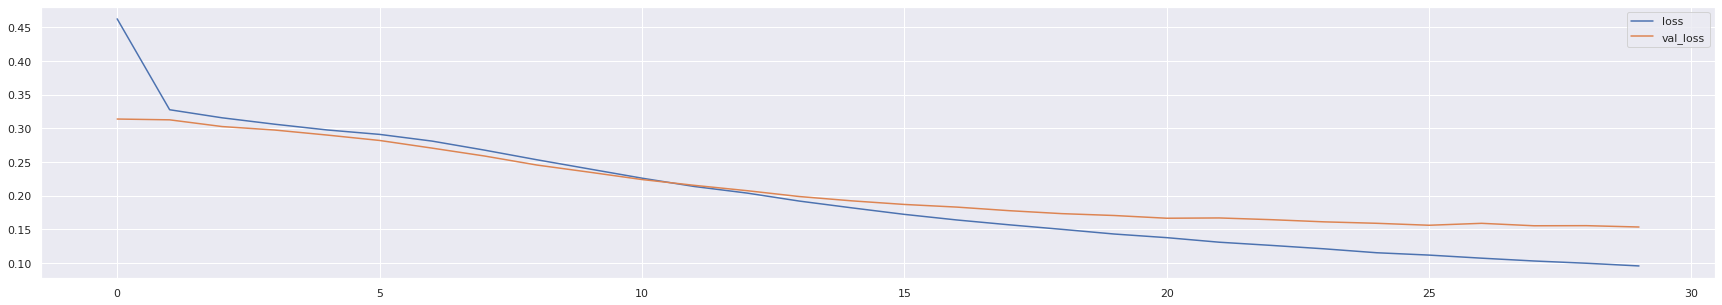

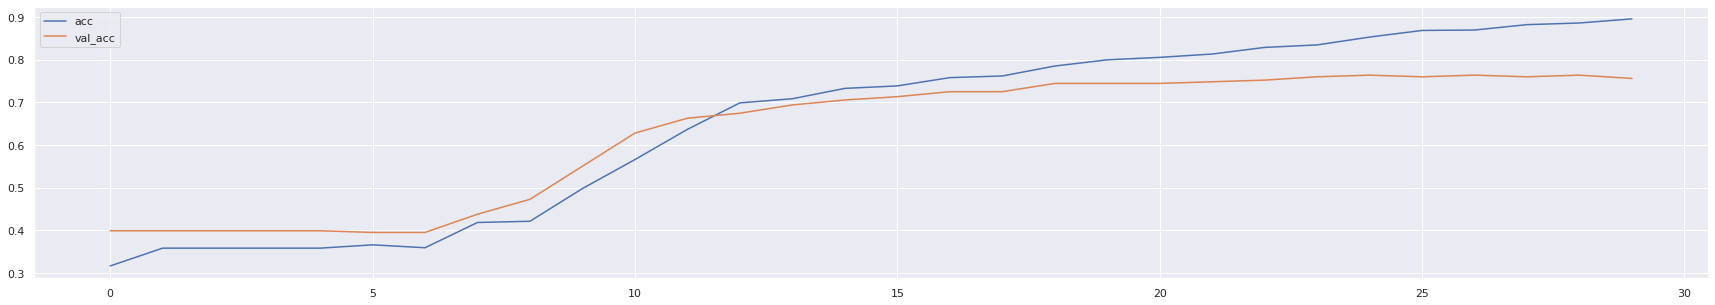

0.9775171688737969


In [114]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(dummy_y[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))